<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENTS_26_04_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align="center"><b>BÀI TẬP COLAB SỐ 02 - 26/04/2021</b></h1>
<h1 align="center"><b>PREDICT EXECUTION TIME OF A PROGRAM WITH GIVEN THE NUMBERS OF INPUT</b></h1>
###LỚP: CS114.L21
###NHÓM:
1. Nguyễn Ngọc Lan Phương - *19520227*
2. Hoàng Anh Tú - *19522450*
3. Nguyễn Quốc Huy - *19521623*

Nguồn tham khảo:

[cross-validation with linear regression](https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression)



Reference:


* [Xử lý dữ liệu](#xulydulieu)
* [Tạo model dự đoán execution time bằng Linear Regression](#linear_regression)
* [Phân chia tập dữ liệu lại bằng cross-validation và vẫn sử dụng model Linear Regression để train](#other_train_test_split)
* [Khởi tạo lại bộ tham số cho mô hình Linear Regression - Regulazation Parameter](#regulazation)
* [Sử dụng model khác](#other_model)


#1. XỬ LÝ DỮ LIỆU:
<a name = "xulydulieu"></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#đọc data và sử dụng hàm read_csv để hiển thị data dưới dạng cột
colnames = ['Numbers of input', 'Execution time']
#data2.txt được dùng để traning model
data_to_train = pd.read_csv("http://cs.uit.edu.vn/data2.txt", names = colnames, header = None)

#data3.txt và data4.txt dùng để test model
data_to_test3 = pd.read_csv("http://cs.uit.edu.vn/data3.txt", names = colnames, header = None)
data_to_test4 = pd.read_csv("http://cs.uit.edu.vn/data4.txt", names = colnames, header = None)

#demo tập dữ liệu bằng cách in ra màn hình 5 dòng đầu tiên
print(data_to_train.head())
data_to_test3.shape


   Numbers of input  Execution time
0           6083695        0.521842
1           1954367        0.152648
2           3734185        0.298548
3           5839301        0.460480
4           6343427        0.527977


(10590, 2)

In [18]:
#phân chia dữ liệu trên tập train
x_train = np.array(data_to_train['Numbers of input']).reshape(-1,1) #x_train gòm cột numbers of input là dữ liệu đầu vào
y_train = np.array(data_to_train['Execution time']) #dữ liệu đầu ra (cần dự đoán)

#phân chia dữ liệu trên tập test từ data3.txt
x_test_data3 = np.array(data_to_test3['Numbers of input']).reshape(-1, 1)
y_test_data3 = np.array(data_to_test3['Execution time'])

#phân chia dữ liệu trên tập test từ data4.txt
x_test_data4 = np.array(data_to_test4['Numbers of input']).reshape(-1, 1)
y_test_data4 = np.array(data_to_test4['Execution time'])

Trực quan hóa dữ liệu train và test bằng mô hình từ thư viện myplotlib.


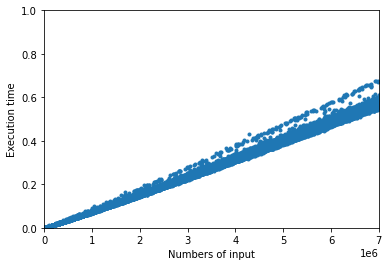

In [19]:
plt.plot(x_train, y_train, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.axis([0, 7000000, 0, 1])
plt.show()

#2. TẠO MODEL DỰ ĐOÁN EXECUTION TIME BẰNG LINEAR REGRESSION
<a name = "linear_regression"> </a>

Chúng em sẽ xây dựng một model dự đoán thời gian thực thi của chương trình từ dữ liệu. Sử dụng **Linear Regression!**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

#tạo model train
lr = LinearRegression().fit(x_train, y_train)

#tính toán độ lỗi của model trên tập dữ liệu train
print("Mean squred error with data_to_train: ", math.sqrt(mean_squared_error(y_train, lr.predict(x_train))))

Mean squred error with data_to_train:  0.011974025522667318


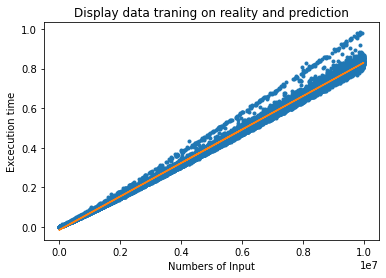

In [21]:
#trực quan hóa trên kết quả dự đoán và thực tế bằng thư viện matplotlib

plt.plot(x_train, y_train, ".")
plt.plot(x_train, lr.predict(x_train))
plt.title("Display data traning on reality and prediction")
plt.xlabel('Numbers of Input')
plt.ylabel('Excecution time')
plt.show()

Nhận thấy độ lỗi của model khá nhỏ, chứng tỏ độ model hoạt động tốt trên tập train. Ta tiến hành đo độ lỗi trên tập test.

In [22]:
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with data3.txt: ", math.sqrt(mean_squared_error(y_test_data3, lr.predict(x_test_data3))))
#tính toán độ lỗi của model trên tập dữ liệu data_to_test_3
print("Mean squared error with data4.txt: ", math.sqrt(mean_squared_error(y_test_data4, lr.predict(x_test_data4))))


Mean squared error with data3.txt:  0.14375308482794058
Mean squared error with data4.txt:  0.4727417563260732


Trực quan hóa dữ liệu trên hai tập test(y_test_data3 và y_test_data4) và tập dự đoán từ đầu vào hai tập test trên.


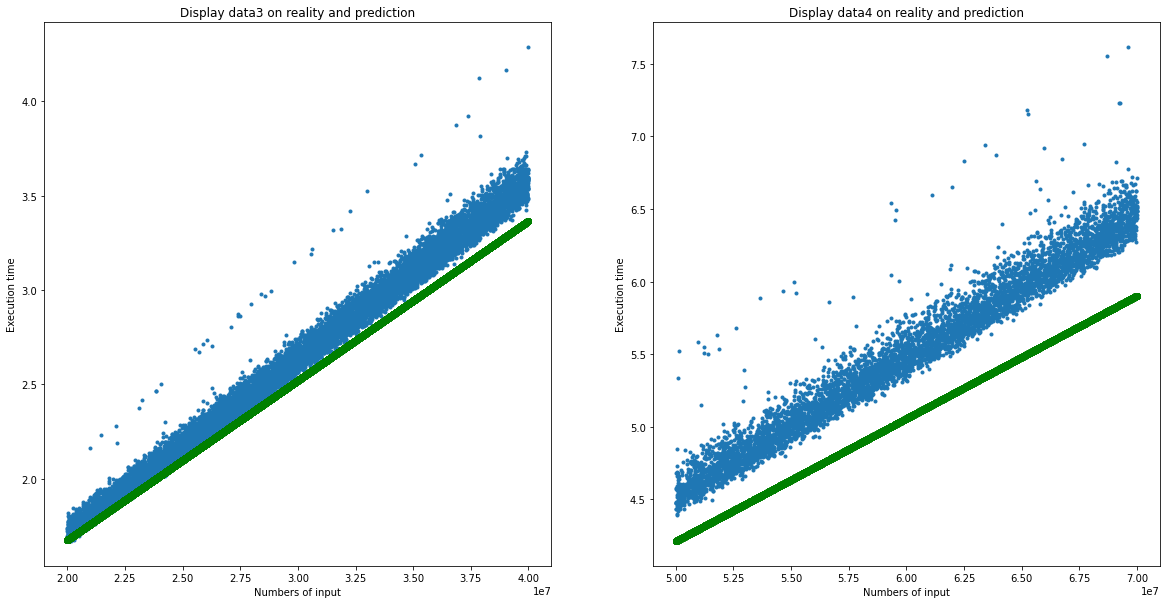

In [23]:
fig, (axs1, axs2) = plt.subplots(1,2, figsize = (20,10))
axs1.plot(x_test_data3, y_test_data3, '.' )
axs1.plot(x_test_data3, lr.predict(x_test_data3), 'go' )


axs1.set_title("Display data3 on reality and prediction")
axs1.set(xlabel='Numbers of input', ylabel='Execution time')


axs2.plot(x_test_data4, y_test_data4, '.' )
axs2.plot(x_test_data4, lr.predict(x_test_data4), 'go' )


axs2.set_title("Display data4 on reality and prediction")
axs2.set(xlabel='Numbers of input', ylabel='Execution time')

plt.show()

Từ độ sai mean squared của tập traning trên mỗi test và từ mô hình trực quan,  ta nhận thấy model traning là quá lớn.

**KẾT LUẬN**: Model hoạt động tốt trên tập train (độ lỗi thấp) nhưng tệ trên 2 tập test (độ lỗi cao). Ta cân nhắn sử dụng model khác hoặc cách chia tập dữ liệu khác để train. Chúng em tiến hành như sau:


In [24]:
# xử lý lại ba tập dữ liệu để tiến hành chia data theo cross-validation
# gộp tập dữ liệu data_to_train và data_to_test3 và data_to_test4
combine_train_data_data3 = pd.concat([data_to_train, data_to_test3], axis = 0)
data = pd.concat([combine_train_data_data3, data_to_test4], axis = 0)
data = data.reset_index()
data_x = np.array(data['Numbers of input'])
data_y = np.array(data['Execution time'])

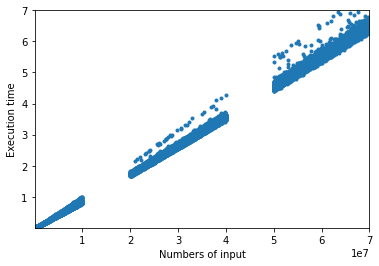

In [25]:
#trực quan hóa ba tập dữ liệu trên cùng một biểu đồ
plt.plot(data_x, data_y, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.axis([200, 70000000, 8.601e-06, 7])
plt.show()

#3. PHÂN CHIA TẬP DỮ LIỆU LẠI BẰNG CROSS-VALIDATION VÀ VẪN SỬ DỤNG LINEAR REGRESSION ĐỂ TRAIN.
<a name = "other_train_test_split"> </a>

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, x_train, y_train)
max = scores[0]
for i in range(len(scores)):
  print('Fold no ', i ,': ', scores[i])
  if scores[i] > max:
    max = scores[i]
    

Fold no  0 :  0.9977277566632954
Fold no  1 :  0.9979837818002528
Fold no  2 :  0.9979185121712443
Fold no  3 :  0.9979986433923524
Fold no  4 :  0.9963276463736497


Rõ ràng khi ta gộp ba bộ dữ liệu trên làm một và trực quan hóa thì có thể thấy được nguyên nhân vì sao model không nắm bắt dữ liệu tốt.
Cho nên chúng em quyết định sẽ sử dụng cross-validation để chia ngẫu nhiên luân phiên các tập trên.

In [27]:
#kiểm tra model một lần nữa trên bộ dữ liệu test -  X_test_cr_val và y_test_cr_val
# print("Mean squred error with data_to_train using svm cross-validation: ", math.sqrt(mean_squared_error(y_test_cr_val, lineg.predict(X_test_cr_val))))
# plt.plot(X_test_cr_val, y_test_cr_val, '.')
# plt.plot(X_test_cr_val, lineg.predict(X_test_cr_val), 'go')
# plt.xlabel('Numbers of input')
# plt.ylabel('Execution time')
# plt.title('Display true value and predicted value on test data using linear model after spliting data with cross-validation')
# plt.show()

**KẾT LUẬN**: Sau khi sử dụng cách phân chia dữ liệu khác là cross-validation ta nhận thấy độ lỗi trên ba tập dữ liệu đền rất nhỏ, chứng tỏ model không còn bị overfitting và xử lý được nguyên do dữ liệu không đồng bộ như trên.

#4. KHỞI TẠO LẠI BỘ THAM SỐ CHO MÔ HÌNH LINEAR REGRESSION - REGULAZATION PARAMETER
<a name = "regulazation"> </a>

#5. SỬ DỤNG MODEL KHÁC 
<a name = "other_model"> </a>

##5.1. SVR - SUPPORT VECTOR REGRESSION


In [28]:
from sklearn.svm import SVR


#tạo model train
svr = SVR().fit(x_train, y_train)

#tính toán độ lỗi của model trên tập dữ liệu train
print("Mean squred error with data_to_train using SVR: ", math.sqrt(mean_squared_error(y_train, svr.predict(x_train))))

Mean squred error with data_to_train using SVR:  0.07024403793969665


In [29]:
#tính toán độ lỗi của model svr trên tập dữ liệu data_to_test_3
print("Mean squared error with data3.txt using svr: ", math.sqrt(mean_squared_error(y_test_data3, svr.predict(x_test_data3))))
#tính toán độ lỗi của model svr trên tập dữ liệu data_to_test_4
print("Mean squared error with data4.txt using svr: ", math.sqrt(mean_squared_error(y_test_data4, svr.predict(x_test_data4))))
print(y_test_data3.min(),y_test_data3.max())
print(y_test_data4.min(),y_test_data4.max())
print(y_train.min(),y_train.max())

Mean squared error with data3.txt using svr:  2.208800536621281
Mean squared error with data4.txt using svr:  5.0426271579860416
1.6696400000000002 4.28766
4.39522 7.6152
8.601e-06 0.983776


**NHẬN XÉT:** Model vẫn tiếp tục bị overfitting khi dùng data2 làm train_set và data3, data4 làm test_set

##5.2 LinearSVR

In [30]:
from sklearn.svm import LinearSVR

#tạo model train
l_svr = LinearSVR().fit(x_train, y_train)

#tính toán độ lỗi của model trên tập dữ liệu train
print("Mean squred error with data_to_train using LinearSVR: ", math.sqrt(mean_squared_error(y_train, l_svr.predict(x_train))))

Mean squred error with data_to_train using LinearSVR:  0.19928678242063


In [31]:
#tính toán độ lỗi của model svr trên tập dữ liệu data_to_test_3
print("Mean squared error with data3.txt using LinearSVR: ", math.sqrt(mean_squared_error(y_test_data3, l_svr.predict(x_test_data3))))
#tính toán độ lỗi của model svr trên tập dữ liệu data_to_test_4
print("Mean squared error with data4.txt using LinearSVR: ", math.sqrt(mean_squared_error(y_test_data4, l_svr.predict(x_test_data4))))


Mean squared error with data3.txt using LinearSVR:  1.240234394150884
Mean squared error with data4.txt using LinearSVR:  2.6642342729186703


**NHẬN XÉT:** Model vẫn tiếp tục bị overfitting khi dùng data2 làm train_set và data3, data4 làm test_set, nhưng có sự thay đổi khả quan hơn so với khi dùng svr

In [32]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor(n_estimators = 1000, random_state = 0, max_features="log2" ).fit(x_train, y_train)


In [33]:
print("Mean squred error with data_to_train using Random Forest: ", math.sqrt(mean_squared_error(y_train, rdr.predict(x_train))))

Mean squred error with data_to_train using Random Forest:  0.004957753273522299


In [34]:
#tính toán độ lỗi của model svr trên tập dữ liệu data_to_test_3
print("Mean squared error with data3.txt using Random Forest: ", math.sqrt(mean_squared_error(y_test_data3, rdr.predict(x_test_data3))))
#tính toán độ lỗi của model svr trên tập dữ liệu data_to_test_4
print("Mean squared error with data4.txt using Random Forest: ", math.sqrt(mean_squared_error(y_test_data4, rdr.predict(x_test_data4))))


Mean squared error with data3.txt using Random Forest:  1.8778880578294188
Mean squared error with data4.txt using Random Forest:  4.701926236634149
